In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import tensorflow as tf  
from sklearn.model_selection import TimeSeriesSplit 
#print('Imported tensorflow', tf.VERSION)
import evaluation

# 1. utils

In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
def df_shift(df, lag, predict_name_column):
    ### takes a data frame, shifts column to be predicted by a lag ###
    columns_features = list(df.columns)
    columns_features.remove(predict_name_column)
    
    value_to_predict = df.loc[:,predict_name_column]   
    df_shifted = df.copy()
                              
    #df_shifted = pd.DataFrame(index = df.index[lag:]
    
    
    for col in columns_features:
        df_shifted[col] = data.loc[:,col].shift(lag)
    
    
    df_shifted = df_shifted.dropna(axis=0)                        
    return df_shifted

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [5]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [6]:
def plotModelResults(model, X_train):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_train)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_train.values, label="actual", linewidth=2.0)
        
    
    error = mean_absolute_percentage_error(y_train,prediction)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

In [7]:
def plotFuture(model, X_train):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    prediction = model.predict(X_train)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

In [18]:
def ModelResults(model, X_test, y_test):
    prediction = model.predict(X_test)
    error = mean_absolute_percentage_error(prediction, y_test)
    print("Mean absolute percentage error {0:.2f}%".format(error))

# XGBoost model applied to weekly dataset => 3% MAPE for next 10 weeks

In [22]:
# open data file
data = pd.read_csv('mean_values.csv', index_col = 'week')
data = data.dropna(axis = 0)
data.head()

,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,f001_low,...,f135_settle,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week.1
week,,,,,,,,,,,,,,,,,,,,,
2030,447.904385,469.788255,459.104019,55.914000,57.430000,54.6920,56.234000,52.074000,53.602,51.184,...,9985.000000,9318.000000,9469.000000,9172.000000,9272.0,9395.000000,9521.000000,9287.0,9362.000000,2030.0
2031,447.898821,471.534605,459.841461,55.230000,55.784000,53.7820,54.854000,53.178000,53.880,51.988,...,9230.000000,9060.000000,9255.000000,8897.000000,9125.0,9117.000000,9304.000000,8933.0,9167.000000,2031.0
2032,449.940416,484.941516,459.939091,52.938000,53.494000,50.7340,51.364000,51.182000,51.458,49.180,...,9871.000000,9275.000000,9431.000000,9212.000000,9305.0,9179.000000,9370.000000,9124.0,9268.000000,2032.0
2033,459.511550,499.467805,466.502830,45.480500,46.283500,44.7125,45.660000,45.072000,45.962,44.910,...,10295.600000,9736.600000,9831.200000,9699.200000,9775.0,9721.200000,9812.600000,9607.2,9709.800000,2033.0
2034,478.310867,508.004203,494.890734,45.185333,45.980667,42.9360,44.653333,43.877333,44.458,42.492,...,10704.333333,9812.333333,9986.333333,9745.666667,9861.0,9777.333333,9980.666667,9701.0,9846.333333,2034.0


In [23]:
## shift data set by timelag
data_shifted = df_shift(data, 10, 'p1')
data_shifted.head()

,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,f001_low,...,f135_settle,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week.1
week,,,,,,,,,,,,,,,,,,,,,
2040,447.904385,507.812397,459.104019,55.914000,57.430000,54.6920,56.234000,52.074000,53.602,51.184,...,9985.000000,9318.000000,9469.000000,9172.000000,9272.0,9395.000000,9521.000000,9287.0,9362.000000,2030.0
2041,447.898821,475.190236,459.841461,55.230000,55.784000,53.7820,54.854000,53.178000,53.880,51.988,...,9230.000000,9060.000000,9255.000000,8897.000000,9125.0,9117.000000,9304.000000,8933.0,9167.000000,2031.0
2042,449.940416,466.298243,459.939091,52.938000,53.494000,50.7340,51.364000,51.182000,51.458,49.180,...,9871.000000,9275.000000,9431.000000,9212.000000,9305.0,9179.000000,9370.000000,9124.0,9268.000000,2032.0
2043,459.511550,448.481044,466.502830,45.480500,46.283500,44.7125,45.660000,45.072000,45.962,44.910,...,10295.600000,9736.600000,9831.200000,9699.200000,9775.0,9721.200000,9812.600000,9607.2,9709.800000,2033.0
2044,478.310867,449.829409,494.890734,45.185333,45.980667,42.9360,44.653333,43.877333,44.458,42.492,...,10704.333333,9812.333333,9986.333333,9745.666667,9861.0,9777.333333,9980.666667,9701.0,9846.333333,2034.0


In [24]:
## save last lagged values for future prediction
X_future = data.copy().drop('p1', axis=1).drop('week.1', axis=1).iloc[-10:,:]
X_future.head()

,p0,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,f001_low,f001_settle,...,f135_low,f135_settle,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle
week,,,,,,,,,,,,,,,,,,,,,
2514,541.990499,547.409850,16.730000,17.1840,16.2680,16.795000,17.0780,17.454000,16.7220,17.135000,...,12611.0,12715.0,25012.000000,25218.0,24835.000000,25021.0,24990.0,25200.0,24793.000000,24982.0
2515,535.716021,540.310340,17.680000,19.0000,17.1640,18.395000,17.5280,18.478000,17.1800,18.005000,...,11994.0,12168.0,24807.000000,24957.0,24495.000000,24720.0,24794.0,24952.0,24471.000000,24705.0
2516,518.464799,527.964200,19.836500,20.5415,18.9195,19.730000,19.1285,19.677000,18.4585,19.090000,...,11010.8,11139.2,24838.600000,24982.6,24610.000000,24818.4,24825.6,24965.0,24586.600000,24789.8
2517,538.457032,532.667794,19.616667,20.7300,19.2500,19.641667,19.1300,19.933333,18.8500,19.141667,...,11145.0,11255.0,24926.666667,25065.0,24728.333333,24895.0,24865.0,25020.0,24668.333333,24830.0
2518,540.923276,545.536530,19.380000,19.6980,18.8180,19.115000,19.1380,19.350000,18.6880,18.935000,...,11140.0,11198.0,24429.000000,24543.0,24027.000000,24266.0,24316.0,24451.0,23891.000000,24142.0


In [25]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBRegressor 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y = data_shifted.p1
x = data_shifted.drop('p1', axis=1).drop('week.1', axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(x, y, test_size=0.03)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
xgb = XGBRegressor(max_depth=3, n_estimators=100)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Test data:
Mean absolute percentage error 3.36%

Train data:


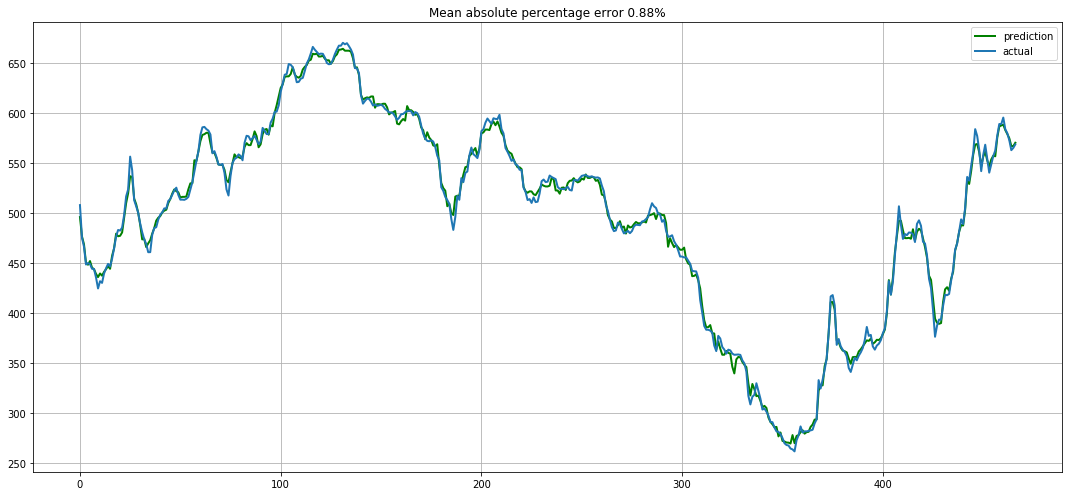

In [27]:
## plot performance on train and test data 
print("Test data:")
ModelResults(xgb, X_test_scaled, y_test)

print("")
print("Train data:")
plotModelResults(xgb, X_train=X_train_scaled)

MAPE weekly 3.191782255696194


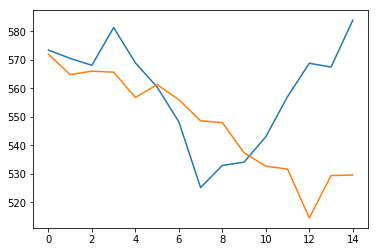

In [28]:
# prediction vs reality on test set
ypred = xgb.predict(X_test_scaled)
ytrue = y_test.values

print("MAPE weekly", evaluation.score_mape(ypred, ytrue, as_days=False))

plt.plot(ytrue)
plt.plot(ypred)
plt.show()

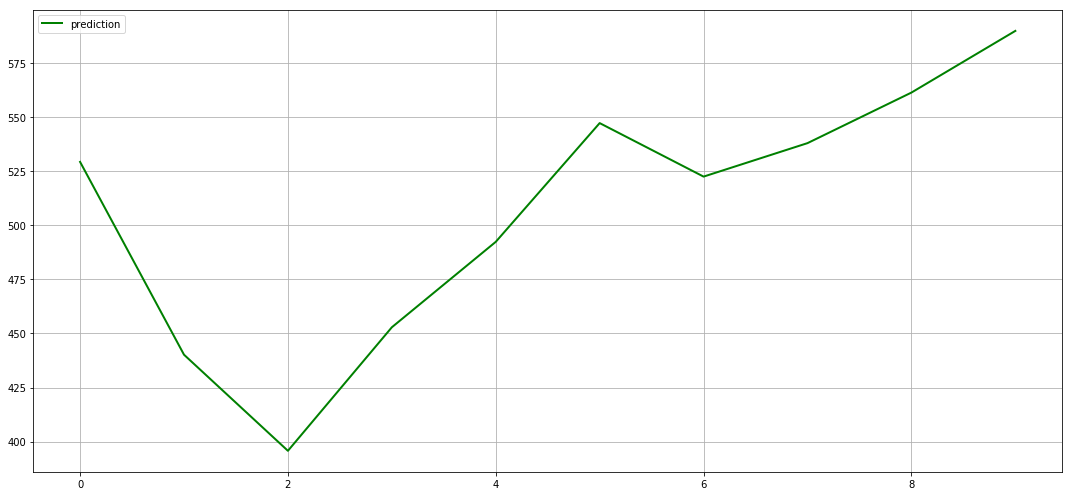

In [29]:
## predict future values for the next 10 weeks
X_future_scaled = scaler.fit_transform(X_future)

plotFuture(xgb, X_train=X_future_scaled)

# XGBoost model applied to daily dataset => 17% MAPE for next 10 weeks

In [32]:
# open data file
data = pd.read_csv('metals_daily_train.csv')
data = data.rename(index=str, columns={'Unnamed: 0' : 'date'})
data = data.set_index('date')
data = data.dropna(axis = 0)
data.head()

,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,f001_low,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
date,,,,,,,,,,,,,,,,,,,,,
20081201,444.511058,457.032497,457.032497,53.08,56.33,52.62,56.29,49.11,52.15,48.62,...,9420.0,9680.0,9315.0,9540.0,9520.0,9800.0,9495.0,9650.0,2030,20081201
20081202,446.908899,465.530103,459.323035,55.99,56.29,54.68,55.30,51.80,52.24,51.04,...,9480.0,9600.0,9430.0,9510.0,9640.0,9730.0,9560.0,9630.0,2030,20081201
20081203,453.484820,482.060575,459.696940,56.50,56.72,54.65,55.21,53.01,53.02,51.21,...,9495.0,9580.0,9400.0,9500.0,9530.0,9690.0,9505.0,9590.0,2030,20081201
20081204,447.532919,472.395859,459.964389,55.50,57.81,54.88,57.62,51.75,54.42,51.60,...,9485.0,9485.0,9120.0,9145.0,9400.0,9445.0,9205.0,9225.0,2030,20081201
20081205,447.084228,471.922241,459.503235,58.50,60.00,56.63,56.75,54.70,56.18,53.45,...,8710.0,9000.0,8595.0,8665.0,8885.0,8940.0,8670.0,8715.0,2030,20081201


In [33]:
## shift data set by timelag
data_shifted = df_shift(data, 70, 'p1')
data_shifted.head()

,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,f001_low,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
date,,,,,,,,,,,,,,,,,,,,,
20090327,444.511058,444.107673,457.032497,53.08,56.33,52.62,56.29,49.11,52.15,48.62,...,9420.0,9680.0,9315.0,9540.0,9520.0,9800.0,9495.0,9650.0,2030.0,20081201.0
20090330,446.908899,444.146679,459.323035,55.99,56.29,54.68,55.30,51.80,52.24,51.04,...,9480.0,9600.0,9430.0,9510.0,9640.0,9730.0,9560.0,9630.0,2030.0,20081201.0
20090331,453.484820,443.854306,459.696940,56.50,56.72,54.65,55.21,53.01,53.02,51.21,...,9495.0,9580.0,9400.0,9500.0,9530.0,9690.0,9505.0,9590.0,2030.0,20081201.0
20090401,447.532919,444.023185,459.964389,55.50,57.81,54.88,57.62,51.75,54.42,51.60,...,9485.0,9485.0,9120.0,9145.0,9400.0,9445.0,9205.0,9225.0,2030.0,20081201.0
20090402,447.084228,443.971209,459.503235,58.50,60.00,56.63,56.75,54.70,56.18,53.45,...,8710.0,9000.0,8595.0,8665.0,8885.0,8940.0,8670.0,8715.0,2030.0,20081201.0


In [34]:
## save last lagged values for future prediction
X_future = data.copy().drop('p1', axis=1).drop('week', axis =1).drop('week_date', axis=1).iloc[-70:,:]
X_future.head()

,p0,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,f001_low,f001_settle,...,f135_low,f135_settle,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle
date,,,,,,,,,,,,,,,,,,,,,
20180126,541.632107,559.147574,12.57,12.670,12.330,12.475,13.186,13.28,12.990,13.205,...,13765.0,13765.0,26250.0,26310.0,26115.0,26195.0,26225.0,26295.0,26105.0,26180.0
20180129,543.078925,560.641179,12.65,13.700,12.580,13.645,13.360,14.03,13.276,14.005,...,13725.0,13775.0,26315.0,27235.0,26200.0,26835.0,26290.0,27750.0,26185.0,26805.0
20180130,542.692923,560.242694,13.73,14.594,13.674,14.035,14.120,14.76,14.084,14.315,...,13665.0,13665.0,27065.0,27130.0,26700.0,26915.0,27000.0,27085.0,26650.0,26865.0
20180131,538.413365,560.003875,14.03,14.178,13.530,13.635,14.378,14.52,13.956,14.075,...,13125.0,13125.0,26900.0,26915.0,26520.0,26715.0,26900.0,26900.0,26510.0,26700.0
20180201,547.702665,562.615362,13.69,14.000,13.000,13.425,14.170,14.44,13.630,13.925,...,13030.0,13085.0,26740.0,26825.0,26630.0,26730.0,26745.0,26795.0,26595.0,26705.0


In [35]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBRegressor 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y = data_shifted.p1
x = data_shifted.drop('p1', axis=1).drop('week', axis=1).drop('week_date', axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(x, y, test_size=0.33)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
xgb = XGBRegressor(max_depth=3, n_estimators=100)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Test data:
Mean absolute percentage error 19.25%

Train data:


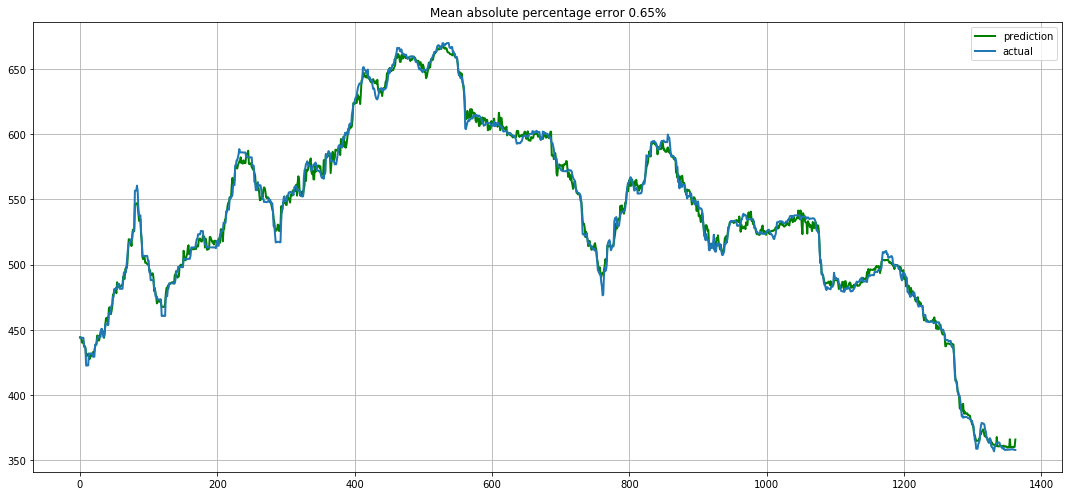

In [37]:
## plot performance on train and test data 
print("Test data:")
ModelResults(xgb, X_test_scaled, y_test)

print("")
print("Train data:")
plotModelResults(xgb, X_train=X_train_scaled)

MAPE weekly 17.872274036882178


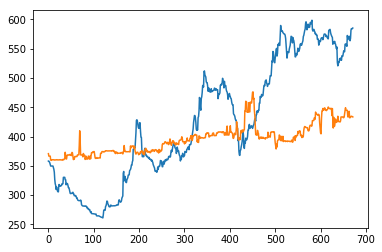

In [38]:
# prediction vs reality on test set
ypred = xgb.predict(X_test_scaled)
ytrue = y_test.values

print("MAPE weekly", evaluation.score_mape(ypred, ytrue, as_days=False))

plt.plot(ytrue)
plt.plot(ypred)
plt.show()

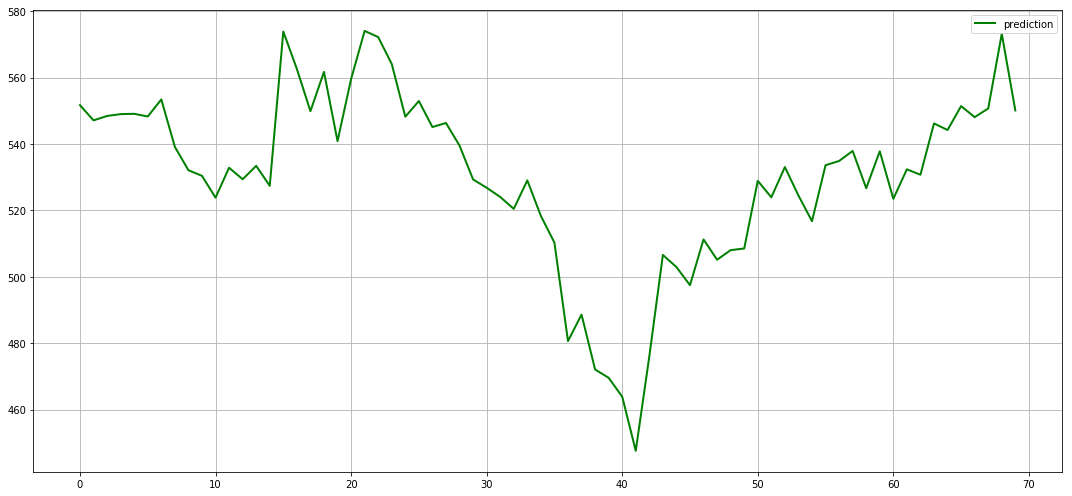

In [39]:
## predict future values for the next 70 days

X_future_scaled = scaler.fit_transform(X_future)

plotFuture(xgb, X_train=X_future_scaled)